# Task 1: Data Preparation

In [15]:
#importing CSV data from the file
import pandas as pd
import numpy as np
red_set= 'redwine.csv'
red = pd.read_csv(red_set, sep = ';', header = None, names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality'])
red.insert(0, "type", "red") 

white_set= 'whitewine.csv'
white = pd.read_csv(white_set, sep = ';', header = None, names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality'])
white.insert(0, "type", "white") 

#concatenating the datasets
wine = pd.concat([red,white])

#dropping columns with random value
wine = wine.drop([0],axis =0)

#checking whether the loaded data is equivalent to the data in the source CSV file
wine.dtypes
wine.head()

#cleaning the data
#NaN, Null, Missing values
#finding number 0f missing values in each column
wine.isnull().sum()

#stripping columns to remove whitespaces
wine['fixed_acidity'] = wine['fixed_acidity'].str.strip()
wine['volatile_acidity'] = wine['volatile_acidity'].str.strip()
wine['citric_acid'] = wine['citric_acid'].str.strip()
wine['residual_sugar'] = wine['residual_sugar'].str.strip()
wine['chlorides'] = wine['chlorides'].str.strip()
wine['free_sulfur_dioxide'] = wine['free_sulfur_dioxide'].str.strip()
wine['total_sulfur_dioxide'] = wine['total_sulfur_dioxide'].str.strip()
wine['density'] = wine['density'].str.strip()
wine['pH'] = wine['pH'].str.strip()
wine['sulphates'] = wine['sulphates'].str.strip()
wine['alcohol'] = wine['alcohol'].str.strip()
wine['quality'] = wine['quality'].str.strip()
wine['type'] = wine['type'].str.strip()

#checking unique values in each column ad converting types
wine['fixed_acidity'].unique()
wine['fixed_acidity'] = wine['fixed_acidity'].astype(float)

wine['volatile_acidity'].unique()
wine['volatile_acidity'] = wine['volatile_acidity'].astype(float)

wine['citric_acid'].unique()
wine['citric_acid'] = wine['citric_acid'].astype(float)

wine['residual_sugar'].unique()
wine['residual_sugar'] = wine['residual_sugar'].astype(float)

wine['chlorides'].unique()
wine['chlorides'] = wine['chlorides'].astype(float)

wine['free_sulfur_dioxide'].unique()
wine['free_sulfur_dioxide']=wine['free_sulfur_dioxide'].astype(float)

wine['total_sulfur_dioxide'].unique()
wine['total_sulfur_dioxide'] = pd.to_numeric(wine['total_sulfur_dioxide'])

wine['density'].unique()
wine['density'] = wine['density'].astype(float)

wine['pH'].unique()
wine['pH'] = wine['pH'].astype(float)

wine['sulphates'].unique()
wine['sulphates'] = wine['sulphates'].astype(float)

wine['alcohol'].unique()
wine['alcohol'] = wine['alcohol'].astype(float)

wine['quality'].unique()
wine['quality'] = wine['quality'].astype(int)

wine['type'].unique()

#grouping values for exploration and modelling
wine['quality'].replace(3,5, inplace=True)
wine['quality'].replace(4,5, inplace=True)
wine['quality'].replace(9,8, inplace=True)

# Task 2 : Data Exploration

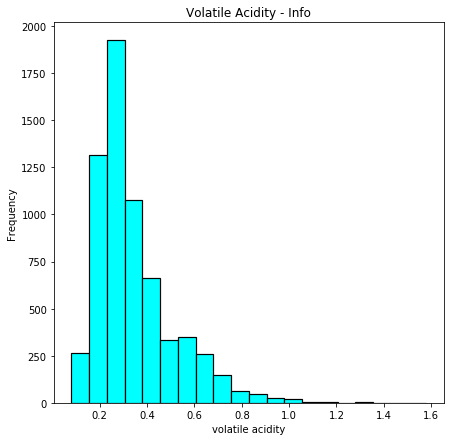

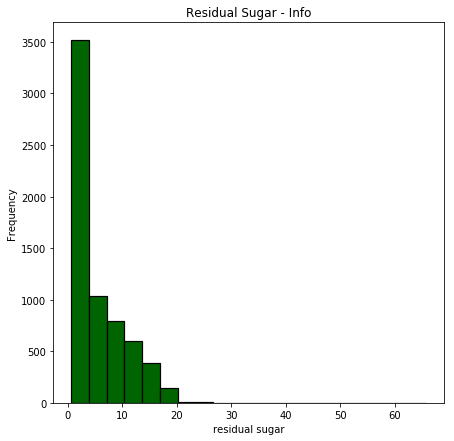

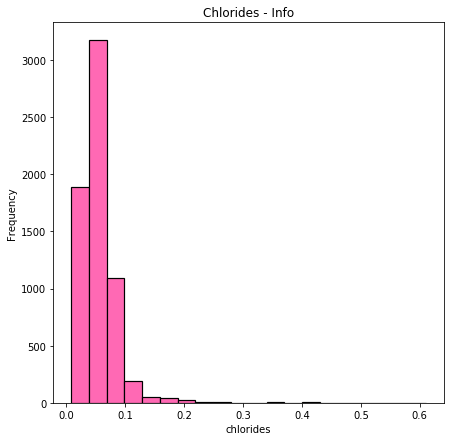

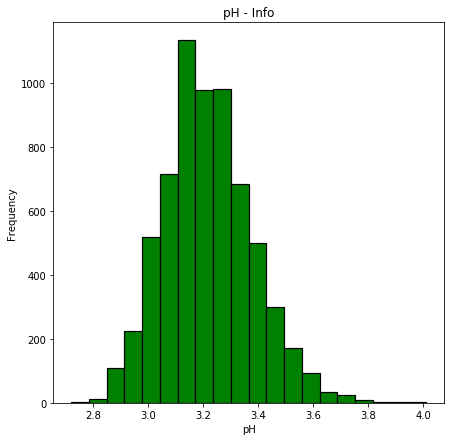

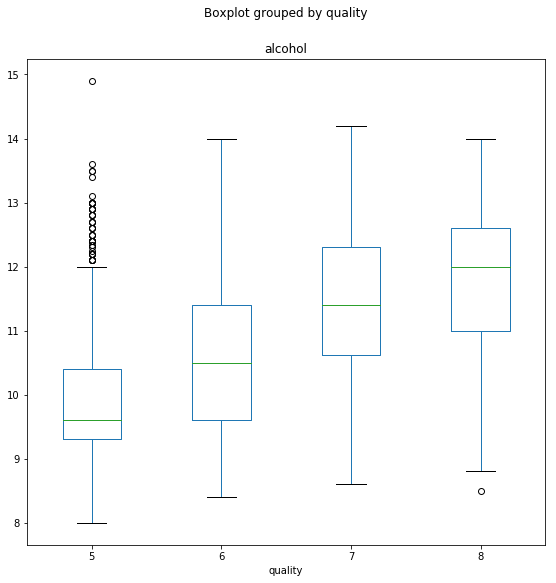

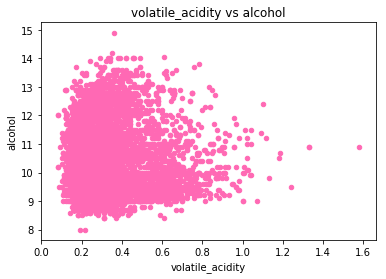

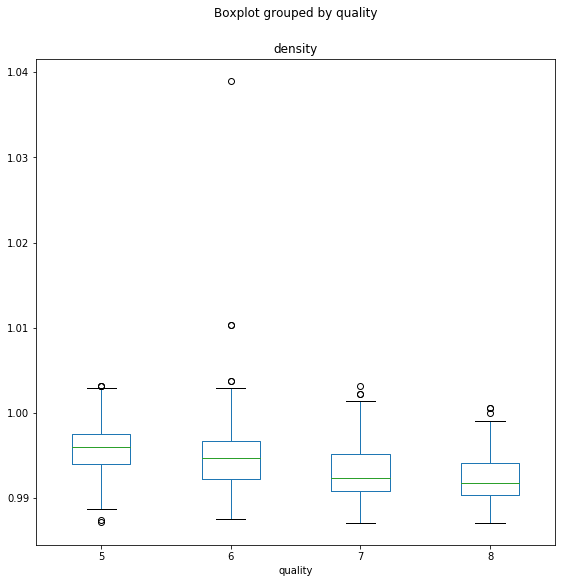

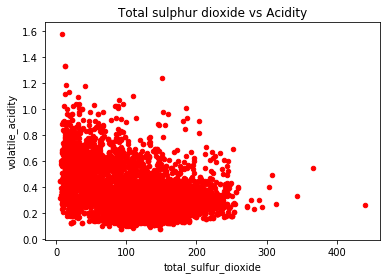

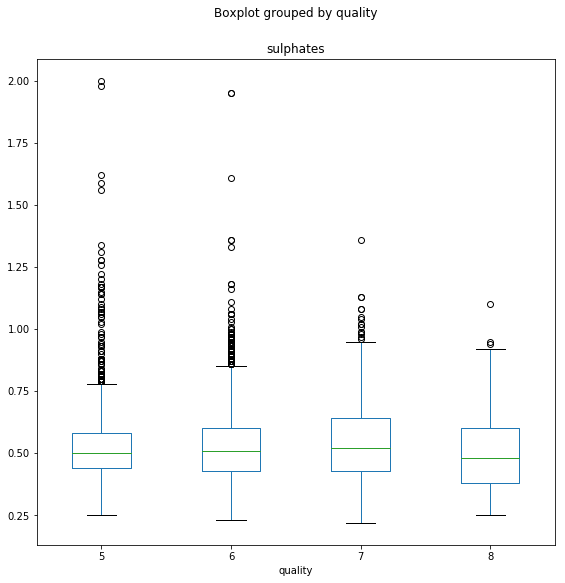

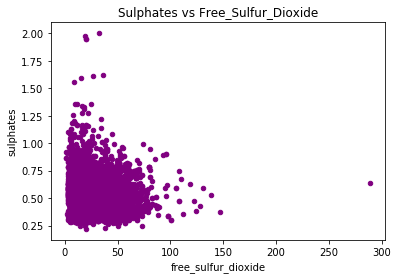

In [16]:
#Choose 10 columns to explore relationships
import matplotlib.pyplot as plt
%matplotlib inline

#Volatile Acidity
wine['volatile_acidity'].plot(kind='hist',color='cyan',edgecolor='black', figsize=(7,7),linewidth=1.2,bins=20)
plt.title('Volatile Acidity - Info')
plt.xlabel('volatile acidity')
plt.show()

#Residual Sugar
wine['residual_sugar'].plot(kind='hist',color='darkgreen',edgecolor='black', figsize=(7,7),linewidth=1.2,bins=20)
plt.title('Residual Sugar - Info')
plt.xlabel('residual sugar')
plt.show()

#Chlorides
wine['chlorides'].plot(kind='hist',color='hotpink',edgecolor='black', figsize=(7,7),linewidth=1.2,bins=20)
plt.title('Chlorides - Info')
plt.xlabel('chlorides')
plt.show()

#pH
wine['pH'].plot(kind='hist',color='green',edgecolor='black', figsize=(7,7),linewidth=1.2,bins=20)
plt.title('pH - Info')
plt.xlabel('pH')
plt.show()

#Alcohol vs Quality
wine.boxplot(column='alcohol',by='quality',figsize=(9,9))
plt.grid(False)
plt.show()

#Volatile Acidity vs Alcohol
wine.plot(kind='scatter',x='volatile_acidity',y='alcohol',color='hotpink')
plt.xlabel('volatile_acidity')
plt.ylabel('alcohol')
plt.title('volatile_acidity vs alcohol')
plt.show()

#Density vs Quality
wine.boxplot(column='density',by='quality',figsize=(9,9))
plt.grid(False)
plt.show()

#Volatile Acidity vs Total Sulphur Dioxide
wine.plot(kind='scatter',x='total_sulfur_dioxide',y='volatile_acidity',color='red')
plt.xlabel('total_sulfur_dioxide')
plt.ylabel('volatile_acidity')
plt.title('Total sulphur dioxide vs Acidity')
plt.show()

#Sulphate vs Quality
wine.boxplot(column='sulphates',by='quality',figsize=(9,9))
plt.grid(False)
plt.show()

#Free Sulphur Dioxide vs Sulphates
wine.plot(kind='scatter',x='free_sulfur_dioxide',y='sulphates',color='PURPLE')
plt.xlabel('free_sulfur_dioxide')
plt.ylabel('sulphates')
plt.title('Sulphates vs Free_Sulfur_Dioxide')
plt.show()

# Task 3 : Data Modelling

## CLASSIFICATION

### K-Nearest Neighbour Classifier without feature selection

In [17]:
#choosing columns for modelling
wine_analysis=wine[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]

#defining the target
target = wine['quality']
target.shape

#KNN for 50-50 Test-Train Split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for k in range(3,25):
    X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.5,random_state=0)
    X_train.shape
    y_train.shape
    y_test.shape

    clf = KNeighborsClassifier(k,weights='distance',p=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)   
    y_pre.shape
    
    print "KNN Classifier for 50-50 split with k value of" ,k
    cm = confusion_matrix(y_test, y_pre)
    print cm
    print "Score : ",accuracy_score(y_test,y_pre)
    print classification_report(y_test,y_pre)

KNN Classifier for 50-50 split with k value of 3
[[712 388  88   9]
 [377 805 211  22]
 [ 84 189 242  19]
 [ 13  35  19  36]]
Score :  0.5524776854416744
              precision    recall  f1-score   support

           5       0.60      0.59      0.60      1197
           6       0.57      0.57      0.57      1415
           7       0.43      0.45      0.44       534
           8       0.42      0.35      0.38       103

   micro avg       0.55      0.55      0.55      3249
   macro avg       0.50      0.49      0.50      3249
weighted avg       0.55      0.55      0.55      3249

KNN Classifier for 50-50 split with k value of 4
[[714 397  80   6]
 [389 824 189  13]
 [ 94 192 234  14]
 [ 14  38  15  36]]
Score :  0.5564789165897199
              precision    recall  f1-score   support

           5       0.59      0.60      0.59      1197
           6       0.57      0.58      0.58      1415
           7       0.45      0.44      0.44       534
           8       0.52      0.35      0

KNN Classifier for 50-50 split with k value of 17
[[771 381  45   0]
 [391 914 109   1]
 [ 73 259 201   1]
 [  9  51  13  30]]
Score :  0.5897199138196368
              precision    recall  f1-score   support

           5       0.62      0.64      0.63      1197
           6       0.57      0.65      0.61      1415
           7       0.55      0.38      0.45       534
           8       0.94      0.29      0.44       103

   micro avg       0.59      0.59      0.59      3249
   macro avg       0.67      0.49      0.53      3249
weighted avg       0.60      0.59      0.58      3249

KNN Classifier for 50-50 split with k value of 18
[[759 397  41   0]
 [398 917  99   1]
 [ 75 258 200   1]
 [ 10  51  13  29]]
Score :  0.5863342566943675
              precision    recall  f1-score   support

           5       0.61      0.63      0.62      1197
           6       0.57      0.65      0.60      1415
           7       0.57      0.37      0.45       534
           8       0.94      0.28     

In [18]:
#KNN for 60-40 Test-Train Split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for k in range(3,25):
    X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.4,random_state=0)
    X_train.shape
    y_train.shape
    y_test.shape

    clf = KNeighborsClassifier(k,weights='distance',p=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)   
    y_pre.shape
    
    print "KNN Classifier for 50-50 split with k value of" ,k
    cm = confusion_matrix(y_test, y_pre)
    print cm
    print "Score : ",accuracy_score(y_test,y_pre)
    print classification_report(y_test,y_pre)

KNN Classifier for 50-50 split with k value of 3
[[601 292  63   3]
 [285 690 137  17]
 [ 67 145 207  14]
 [ 13  26   9  30]]
Score :  0.5879184301654482
              precision    recall  f1-score   support

           5       0.62      0.63      0.62       959
           6       0.60      0.61      0.60      1129
           7       0.50      0.48      0.49       433
           8       0.47      0.38      0.42        78

   micro avg       0.59      0.59      0.59      2599
   macro avg       0.55      0.53      0.53      2599
weighted avg       0.59      0.59      0.59      2599

KNN Classifier for 50-50 split with k value of 4
[[600 299  58   2]
 [286 692 138  13]
 [ 71 147 205  10]
 [ 12  30   6  30]]
Score :  0.5875336667949211
              precision    recall  f1-score   support

           5       0.62      0.63      0.62       959
           6       0.59      0.61      0.60      1129
           7       0.50      0.47      0.49       433
           8       0.55      0.38      0

KNN Classifier for 50-50 split with k value of 17
[[629 301  29   0]
 [295 762  72   0]
 [ 59 191 183   0]
 [  9  39   6  24]]
Score :  0.6148518661023471
              precision    recall  f1-score   support

           5       0.63      0.66      0.64       959
           6       0.59      0.67      0.63      1129
           7       0.63      0.42      0.51       433
           8       1.00      0.31      0.47        78

   micro avg       0.61      0.61      0.61      2599
   macro avg       0.71      0.52      0.56      2599
weighted avg       0.63      0.61      0.61      2599

KNN Classifier for 50-50 split with k value of 18
[[638 295  26   0]
 [289 772  68   0]
 [ 65 191 177   0]
 [  9  39   7  23]]
Score :  0.6194690265486725
              precision    recall  f1-score   support

           5       0.64      0.67      0.65       959
           6       0.60      0.68      0.64      1129
           7       0.64      0.41      0.50       433
           8       1.00      0.29     

In [19]:
#KNN for 80-20 Test-Train Split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for k in range(3,25):
    X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.2,random_state=0)
    X_train.shape
    y_train.shape
    y_test.shape

    clf = KNeighborsClassifier(k,weights='distance',p=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)   
    y_pre.shape
    
    print "KNN Classifier for 50-50 split with k value of" ,k
    cm = confusion_matrix(y_test, y_pre)
    print cm
    print "Score : ",accuracy_score(y_test,y_pre)
    print classification_report(y_test,y_pre)

KNN Classifier for 50-50 split with k value of 3
[[304 132  30   2]
 [140 371  58  10]
 [ 28  64 115   4]
 [  3  13   8  18]]
Score :  0.6215384615384615
              precision    recall  f1-score   support

           5       0.64      0.65      0.64       468
           6       0.64      0.64      0.64       579
           7       0.55      0.55      0.55       211
           8       0.53      0.43      0.47        42

   micro avg       0.62      0.62      0.62      1300
   macro avg       0.59      0.57      0.58      1300
weighted avg       0.62      0.62      0.62      1300

KNN Classifier for 50-50 split with k value of 4
[[305 140  22   1]
 [137 380  53   9]
 [ 28  66 114   3]
 [  2  14   9  17]]
Score :  0.6276923076923077
              precision    recall  f1-score   support

           5       0.65      0.65      0.65       468
           6       0.63      0.66      0.64       579
           7       0.58      0.54      0.56       211
           8       0.57      0.40      0

KNN Classifier for 50-50 split with k value of 17
[[320 132  16   0]
 [132 414  33   0]
 [ 29  78 104   0]
 [  3  19   5  15]]
Score :  0.6561538461538462
              precision    recall  f1-score   support

           5       0.66      0.68      0.67       468
           6       0.64      0.72      0.68       579
           7       0.66      0.49      0.56       211
           8       1.00      0.36      0.53        42

   micro avg       0.66      0.66      0.66      1300
   macro avg       0.74      0.56      0.61      1300
weighted avg       0.66      0.66      0.65      1300

KNN Classifier for 50-50 split with k value of 18
[[320 132  16   0]
 [130 421  28   0]
 [ 28  76 107   0]
 [  2  21   5  14]]
Score :  0.6630769230769231
              precision    recall  f1-score   support

           5       0.67      0.68      0.68       468
           6       0.65      0.73      0.69       579
           7       0.69      0.51      0.58       211
           8       1.00      0.33     

### K-Nearest Neighbour With Hill Climbing Technique

In [20]:
#choosing columns for modelling
wine_data = wine_analysis.iloc[:,:].values

#defining the target
targets = target.iloc[:].values
wine_target = targets.flatten()

wine_data
wine_target

#Hill Climbing technique for KNN 50%-50%
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

new_Ind = []
cur_MaxScore = 0.0
col_num = 11
col_Ind_Random = shuffle(range(0,col_num), random_state=32)


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = wine_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, wine_target, test_size=0.5, random_state=0)
    clf = KNeighborsClassifier(19, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    cur_Score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pre)

    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)
        print "There are " + str(len(new_Ind)) + " features selected:"
        print new_Ind
        
print cm
print classification_report(y_test,y_pre)       

Score with 1 selected features: 0.48722683902739305
There are 1 features selected:
[10]
Score with 2 selected features: 0.5392428439519852
There are 2 features selected:
[10, 1]
Score with 3 selected features: 0.6124961526623577
There are 3 features selected:
[10, 1, 2]
Score with 4 selected features: 0.6208064019698368
There are 4 features selected:
[10, 1, 2, 9]
Score with 5 selected features: 0.6214219759926131
There are 5 features selected:
[10, 1, 2, 9, 0]
Score with 6 selected features: 0.6229609110495538
There are 6 features selected:
[10, 1, 2, 9, 0, 8]
Score with 7 selected features: 0.6260387811634349
There are 7 features selected:
[10, 1, 2, 9, 0, 8, 4]
[[775 388  34   0]
 [316 987 111   1]
 [ 32 262 240   0]
 [  3  46  24  30]]
              precision    recall  f1-score   support

           5       0.69      0.65      0.67      1197
           6       0.59      0.70      0.64      1415
           7       0.59      0.45      0.51       534
           8       0.97      0.29

In [21]:
#Hill Climbing technique for KNN 60%-40%
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

new_Ind = []
cur_MaxScore = 0.0
col_num = 11
col_Ind_Random = shuffle(range(0,col_num), random_state=32)


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = wine_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, wine_target, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(15, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    cur_Score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pre)

    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)
        print "There are " + str(len(new_Ind)) + " features selected:"
        print new_Ind
        
print cm
print classification_report(y_test,y_pre)       

Score with 1 selected features: 0.49826856483262794
There are 1 features selected:
[10]
Score with 2 selected features: 0.5390534821085032
There are 2 features selected:
[10, 1]
Score with 3 selected features: 0.6136975759907657
There are 3 features selected:
[10, 1, 2]
Score with 4 selected features: 0.6340900346287034
There are 4 features selected:
[10, 1, 2, 9]
Score with 5 selected features: 0.6352443247402847
There are 5 features selected:
[10, 1, 2, 9, 3]
[[653 271  34   1]
 [260 765 102   2]
 [ 28 197 206   2]
 [  3  32  17  26]]
              precision    recall  f1-score   support

           5       0.69      0.68      0.69       959
           6       0.60      0.68      0.64      1129
           7       0.57      0.48      0.52       433
           8       0.84      0.33      0.48        78

   micro avg       0.63      0.63      0.63      2599
   macro avg       0.68      0.54      0.58      2599
weighted avg       0.64      0.63      0.63      2599



In [22]:
#Hill Climbing technique for KNN 80%-20%
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

new_Ind = []
cur_MaxScore = 0.0
col_num = 11
col_Ind_Random = shuffle(range(0,col_num), random_state=32)


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = wine_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, wine_target, test_size=0.2, random_state=0)
    clf = KNeighborsClassifier(15, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    cur_Score = clf.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pre)

    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)
        print "There are " + str(len(new_Ind)) + " features selected:"
        print new_Ind
        
print cm
print classification_report(y_test,y_pre)       

Score with 1 selected features: 0.49846153846153846
There are 1 features selected:
[10]
Score with 2 selected features: 0.5292307692307693
There are 2 features selected:
[10, 1]
Score with 3 selected features: 0.6338461538461538
There are 3 features selected:
[10, 1, 2]
Score with 4 selected features: 0.6569230769230769
There are 4 features selected:
[10, 1, 2, 9]
Score with 5 selected features: 0.6730769230769231
There are 5 features selected:
[10, 1, 2, 9, 3]
Score with 6 selected features: 0.693076923076923
There are 6 features selected:
[10, 1, 2, 9, 3, 0]
[[331 122  15   0]
 [ 96 437  45   1]
 [ 11  85 113   2]
 [  0  15  12  15]]
              precision    recall  f1-score   support

           5       0.76      0.71      0.73       468
           6       0.66      0.75      0.71       579
           7       0.61      0.54      0.57       211
           8       0.83      0.36      0.50        42

   micro avg       0.69      0.69      0.69      1300
   macro avg       0.72      0

### Decision Tree Classifier

In [23]:
#choosing columns for modelling
wine_analysis_decision=wine[['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']]

#Decision Tree for 50-50 Test-Train split Using Criterion Gini
X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.5,random_state=10)
X_train
X_train.shape
y_train
y_train.shape
X_test
X_test.shape
y_test
y_test.shape

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion='gini')
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)   
y_pre

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

print "Score :", accuracy_score(y_test,y_pre)

[[743 391  59   8]
 [307 865 211  20]
 [ 39 198 278  21]
 [  9  41  24  35]]
              precision    recall  f1-score   support

           5       0.68      0.62      0.65      1201
           6       0.58      0.62      0.60      1403
           7       0.49      0.52      0.50       536
           8       0.42      0.32      0.36       109

   micro avg       0.59      0.59      0.59      3249
   macro avg       0.54      0.52      0.53      3249
weighted avg       0.59      0.59      0.59      3249

Score : 0.5912588488765774


In [24]:
#Decision Tree for 60-40 Test-Train split Using Criterion Gini
X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.4,random_state=10)
X_train
X_train.shape
y_train
y_train.shape
X_test
X_test.shape
y_test
y_test.shape

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion='gini')
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)   
y_pre

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

print "Score :", accuracy_score(y_test,y_pre)

[[631 275  46   8]
 [250 696 142  34]
 [ 45 146 210  29]
 [ 11  22  21  33]]
              precision    recall  f1-score   support

           5       0.67      0.66      0.67       960
           6       0.61      0.62      0.62      1122
           7       0.50      0.49      0.49       430
           8       0.32      0.38      0.35        87

   micro avg       0.60      0.60      0.60      2599
   macro avg       0.53      0.54      0.53      2599
weighted avg       0.61      0.60      0.60      2599

Score : 0.6040784917275875


In [25]:
#Decision Tree for 80-20 Test-Train split Using Criterion Gini
X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.2,random_state=7)
X_train
X_train.shape
y_train
y_train.shape
X_test
X_test.shape
y_test
y_test.shape

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion='gini')
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)   
y_pre

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

print "Score :", accuracy_score(y_test,y_pre)

[[306 116  26   3]
 [126 392  54  15]
 [ 16  66 124  12]
 [  4  15  11  14]]
              precision    recall  f1-score   support

           5       0.68      0.68      0.68       451
           6       0.67      0.67      0.67       587
           7       0.58      0.57      0.57       218
           8       0.32      0.32      0.32        44

   micro avg       0.64      0.64      0.64      1300
   macro avg       0.56      0.56      0.56      1300
weighted avg       0.64      0.64      0.64      1300

Score : 0.6430769230769231


In [26]:
#Decision Tree for 50-50 Test-Train split Using Criterion Entropy
X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.5,random_state=10)
X_train
X_train.shape
y_train
y_train.shape
X_test
X_test.shape
y_test
y_test.shape

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion='entropy')
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)   
y_pre

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

print "Score :", accuracy_score(y_test,y_pre)

[[750 367  78   6]
 [302 879 198  24]
 [ 31 199 272  34]
 [  8  43  20  38]]
              precision    recall  f1-score   support

           5       0.69      0.62      0.65      1201
           6       0.59      0.63      0.61      1403
           7       0.48      0.51      0.49       536
           8       0.37      0.35      0.36       109

   micro avg       0.60      0.60      0.60      3249
   macro avg       0.53      0.53      0.53      3249
weighted avg       0.60      0.60      0.60      3249

Score : 0.5967990150815635


In [27]:
#Decision Tree for 60-40 Test-Train split Using Criterion Entropy
X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.4,random_state=10)
X_train
X_train.shape
y_train
y_train.shape
X_test
X_test.shape
y_test
y_test.shape

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion='entropy')
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)   
y_pre

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

print "Score :", accuracy_score(y_test,y_pre)

[[638 265  50   7]
 [254 711 127  30]
 [ 26 143 237  24]
 [  6  23  21  37]]
              precision    recall  f1-score   support

           5       0.69      0.66      0.68       960
           6       0.62      0.63      0.63      1122
           7       0.54      0.55      0.55       430
           8       0.38      0.43      0.40        87

   micro avg       0.62      0.62      0.62      2599
   macro avg       0.56      0.57      0.56      2599
weighted avg       0.63      0.62      0.63      2599

Score : 0.6244709503655252


In [28]:
#Decision Tree for 80-20 Test-Train split Using Criterion Entropy
X_train, X_test, y_train, y_test = train_test_split(wine_analysis,target,test_size=0.2,random_state=7)
X_train
X_train.shape
y_train
y_train.shape
X_test
X_test.shape
y_test
y_test.shape

from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(criterion='entropy')
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)   
y_pre

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

print "Score :", accuracy_score(y_test,y_pre)

[[332  95  18   6]
 [110 388  77  12]
 [ 16  60 130  12]
 [  4  15  10  15]]
              precision    recall  f1-score   support

           5       0.72      0.74      0.73       451
           6       0.70      0.66      0.68       587
           7       0.55      0.60      0.57       218
           8       0.33      0.34      0.34        44

   micro avg       0.67      0.67      0.67      1300
   macro avg       0.58      0.58      0.58      1300
weighted avg       0.67      0.67      0.67      1300

Score : 0.6653846153846154
